### Installing and Importing Dependencies

In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

### Loading Datasets

In [3]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data['Species'] = iris.target

In [4]:
mnist = load_digits()
mnist_data = pd.DataFrame(mnist.data, columns = mnist.feature_names)
mnist_data['Digits'] = mnist.target

### K-Means on iris data

In [5]:
X_cluster = iris_data.iloc[:, :-1]
y_cluster = iris_data['Species']

#### Clustering using k-means

In [6]:
k_means = KMeans(n_clusters = 3)
iris_data['Cluster'] = k_means.fit_predict(X_cluster)

C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Visualizing

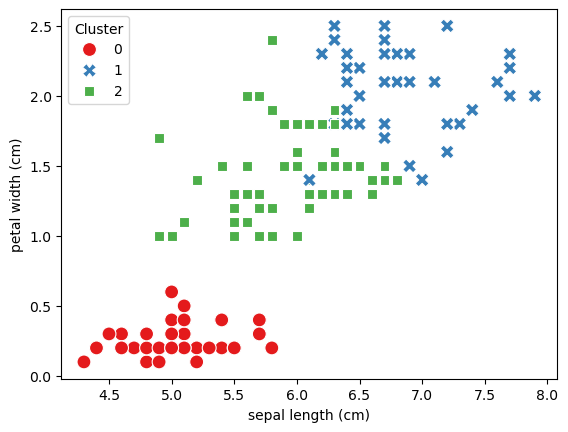

In [7]:
sns.scatterplot(iris_data, x = 'sepal length (cm)', y = 'petal width (cm)', 
                hue = 'Cluster', palette='Set1', style='Cluster', s=100)
plt.show()

In [8]:
print('Inertia of Cluster              :', k_means.inertia_)
print('Silhouette Score of Cluster     :', silhouette_score(X_cluster, k_means.labels_))
print('Davies Bouldin Score of Cluster :', davies_bouldin_score(X_cluster, k_means.labels_))

Inertia of Cluster              : 78.85566582597731
Silhouette Score of Cluster     : 0.5511916046195918
Davies Bouldin Score of Cluster : 0.6660385791628499


### PCA on MNIST Dataset

In [9]:
mnist_data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Digits
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
X_mnist = mnist_data.iloc[:, :-1]
y_mnist = mnist_data['Digits']

#### PCA Step

In [11]:
pca = PCA(n_components = 5)
pca_scaled = pca.fit_transform(X_mnist)

In [12]:
new_mnist = pd.DataFrame(pca_scaled, columns = ['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5'])
new_mnist['Digits'] = y_mnist

In [13]:
new_mnist.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,Digits
0,-1.259466,-21.274883,9.463055,-13.014189,7.128823,0
1,7.957611,20.768699,-4.439506,14.893664,-5.896249,1
2,6.991923,9.955986,-2.958558,12.288302,18.126023,2
3,-15.906105,-3.332464,-9.824372,12.275838,-6.965169,3
4,23.306867,-4.269061,5.675129,13.851524,0.358124,4


#### Visualizing

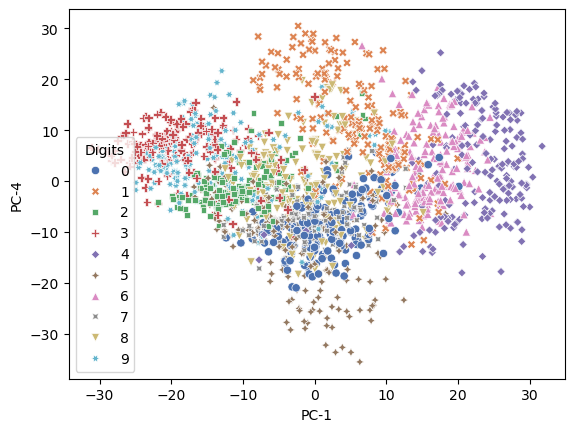

In [14]:
sns.scatterplot(new_mnist, x = 'PC-1', y = 'PC-4', palette='deep', hue = 'Digits', style = 'Digits')
plt.show()